# [Predict the churn risk rate](https://www.kaggle.com/parv619/hackerearth-how-not-to-lose-a-customer-in-10-days)
**Max. score: 100** <br>
Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. . Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

*Task:
Your task is to predict the churn score for a website based on the features provided in the dataset.*

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import copy
import timeit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Import Dataset

In [2]:
dataset_train=pd.read_csv('./train.csv')
dataset_train_copy=dataset_train.copy()

In [3]:
dataset_train_copy.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
dataset_train_copy.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [5]:
dataset_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

## Data Cleaning

### Handling Null Values

In [6]:
# Check for NaN data
display(dataset_train_copy.isnull().sum())

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

### Removing all negative value rows

In [7]:
# Dropping all rows whose 'avg_time_spent' is negative
low = np.where(dataset_train_copy['avg_time_spent'] < 0)
dataset_train_copy.drop(low[0],inplace=True)
# Reseting the default index
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

# Dropping all rows whose 'points_in_wallet' is negative 
l1 = np.where(dataset_train_copy['points_in_wallet'] < 0)
dataset_train_copy.drop(l1[0],inplace=True)
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

# Dropping all rows whose 'avg_transaction_value' is negative 
l2 = np.where(dataset_train_copy['avg_transaction_value'] < 0)
dataset_train_copy.drop(l2[0],inplace=True)
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

# Dropping all rows whose 'days_since_last_login' is negative 
l3 = np.where(dataset_train_copy['days_since_last_login'] < 0)
dataset_train_copy.drop(l3[0],inplace=True)
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

# Removing all the rows having 'churn_risk_score' == -1 
l4 = np.where(dataset_train_copy['churn_risk_score'] == -1)
dataset_train_copy.drop(l4[0],inplace=True)
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

In [8]:
# class distribution
print(dataset_train_copy.groupby('churn_risk_score').size())

churn_risk_score
1    2413
2    2471
3    9395
4    9113
5    8802
dtype: int64


In [9]:
dataset_train_copy=dataset_train_copy.fillna(method='ffill')  #Filling Null values using Forward Fill Method

In [10]:
display(dataset_train_copy.isnull().sum())

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [11]:
print(dataset_train_copy['membership_category'].value_counts())

Basic Membership       6701
No Membership          6663
Gold Membership        5937
Silver Membership      5229
Premium Membership     3877
Platinum Membership    3787
Name: membership_category, dtype: int64


### Label Encoding

In [12]:
dataset_train_encoded = dataset_train_copy.copy()
categ = ['gender','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','region_category','membership_category','avg_frequency_login_days','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback']
encoder = LabelEncoder()
dataset_train_encoded[categ] = dataset_train_encoded[categ].apply(encoder.fit_transform)
dataset_train_encoded.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,0,XW0DQ7H,2,3,2017-08-17,1,xxxxxxxx,...,300.63,53005.25,628,781.75,1,1,0,1,4,2
1,fffe43004900440032003100300035003700,Traci Peery,32,0,5K0N3X1,0,4,2017-08-28,0,CID21329,...,306.34,12838.38,617,781.75,1,0,1,2,5,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,0,1F2TCL3,1,2,2016-11-11,2,CID12313,...,516.16,21027.00,658,500.69,0,1,1,3,3,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,1,VJGJ33N,0,2,2016-10-29,2,CID3793,...,53.27,25239.56,1400,567.66,0,1,1,4,3,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,0,SVZXCWB,0,2,2017-09-12,1,xxxxxxxx,...,113.13,24483.66,627,663.06,0,1,1,2,3,5


In [13]:
print(encoder.classes_)

['No reason specified' 'Poor Customer Service' 'Poor Product Quality'
 'Poor Website' 'Products always in Stock' 'Quality Customer Care'
 'Reasonable Price' 'Too many ads' 'User Friendly Website']


In [31]:
corr=dataset_train_encoded.corr()["churn_risk_score"].abs().sort_values(ascending=False)
corr

churn_risk_score                1.000000
membership_category             0.440104
avg_transaction_value           0.363690
feedback                        0.337454
points_in_wallet                0.302852
offer_application_preference    0.038766
preferred_offer_types           0.037590
avg_frequency_login_days        0.035780
days_since_last_login           0.033287
joined_through_referral         0.030665
region_category                 0.027722
avg_time_spent                  0.027328
medium_of_operation             0.019976
past_complaint                  0.012077
used_special_discount           0.008255
gender                          0.005359
internet_option                 0.004766
complaint_status                0.004404
age                             0.000609
Name: churn_risk_score, dtype: float64

## Select and Train a Model

In [15]:
#split dataset in features and target variable
feature_cols = ['region_category','membership_category',
'avg_time_spent',
'avg_transaction_value',
'points_in_wallet','complaint_status',
'feedback'
]
X = dataset_train_encoded[feature_cols] # Features
y = dataset_train_encoded.churn_risk_score # Target variable

### Oversampling for Imbalanced Dataset

In [16]:
# Applying SMOTEN Over Sampling Strategy
from imblearn.over_sampling import SMOTEN
oversampler = SMOTEN()
X_ov,y_ov = oversampler.fit_resample(X,y)
print('The dataset before oversampling: ',X.shape,y.shape)
print('The dataset after oversampling: ',X_ov.shape,y_ov.shape)

The dataset before oversampling:  (32194, 7) (32194,)
The dataset after oversampling:  (46975, 7) (46975,)


In [17]:
# Now we are having equally balanced target labels
print(sum(y == 1),sum(y_ov == 1))
print(sum(y == 2),sum(y_ov == 2))
print(sum(y == 3),sum(y_ov == 3))
print(sum(y == 4),sum(y_ov == 4))
print(sum(y == 5),sum(y_ov == 5))

2413 9395
2471 9395
9395 9395
9113 9395
8802 9395


In [18]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_ov = scaler.fit_transform(X_ov)

### Training and Evaluating on the Training Set

In [19]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_ov,y_ov, test_size=0.2, random_state=42) # 80% training and 20% test

In [20]:
%time
# SVM Classifier
sv = svm.SVC()
sv=sv.fit(X_train, y_train)
sv_pred=sv.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, sv_pred)*100)

Wall time: 0 ns
Accuracy: 64.21500798296967


In [21]:
%time
# Decision Tree Classifier
dt=DecisionTreeClassifier(min_samples_split=100,random_state = 1)
dt=dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred)*100)

Wall time: 0 ns
Accuracy: 81.29856306546034


In [22]:
%time
# Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=1000,max_depth=25)
rfc=rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred)*100)

Wall time: 0 ns
Accuracy: 84.28951569984035


In [23]:
%time
# Create XGBClassifier object
xgb = XGBClassifier(objective = 'multi:softprob')
# Train XGB Classifier
xgb=xgb.fit(X_train, y_train)
#Predict the response for test dataset
y_pred=xgb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Wall time: 0 ns
C:\Users\ahsan\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[16:16:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 85.22618414050027


In [24]:
# Model Classification Report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94      1887
           2       0.96      0.91      0.93      1875
           3       0.93      0.91      0.92      1900
           4       0.72      0.63      0.67      1851
           5       0.74      0.85      0.79      1882

    accuracy                           0.85      9395
   macro avg       0.85      0.85      0.85      9395
weighted avg       0.85      0.85      0.85      9395



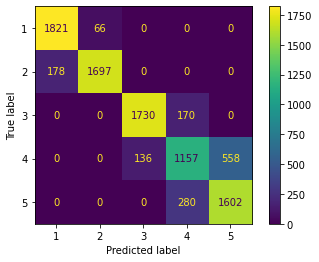

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, X_test, y_test)
plt.show()

## Final Submission

In [26]:
final_score = pd.DataFrame(y_pred,columns=['churn_risk_score'])
final_score

,churn_risk_score
0,3
1,5
2,1
3,3
4,3
...,...
9390,4
9391,1
9392,4
9393,3


In [27]:
cust_id = pd.DataFrame(dataset_train_encoded['customer_id'],columns=['customer_id'])
cust_id

,customer_id
0,fffe4300490044003600300030003800
1,fffe43004900440032003100300035003700
2,fffe4300490044003100390032003600
3,fffe43004900440036003000330031003600
4,fffe43004900440031003900350030003600
...,...
32189,fffe4300490044003800310034003500
32190,fffe43004900440034003900300036003500
32191,fffe4300490044003500330034003100
32192,fffe43004900440031003200390039003000


In [28]:
prediction = pd.concat([cust_id,final_score],axis=1)
prediction

,customer_id,churn_risk_score
0,fffe4300490044003600300030003800,3.0
1,fffe43004900440032003100300035003700,5.0
2,fffe4300490044003100390032003600,1.0
3,fffe43004900440036003000330031003600,3.0
4,fffe43004900440031003900350030003600,3.0
...,...,...
32189,fffe4300490044003800310034003500,NaN
32190,fffe43004900440034003900300036003500,NaN
32191,fffe4300490044003500330034003100,NaN
32192,fffe43004900440031003200390039003000,NaN


In [29]:
prediction.to_csv('./prediction.csv')